# Quantitative Analysis of Spatially Correlated 2D Fields

## 1. Problem formulation

Many imaging-derived datasets can be represented as two-dimensional scalar fields

$$
u(x,y): \Omega \in \mathbb{R}^2 \rightarrow \mathbb{R},
$$

where intensity encodes an underlying spatially organized structure. Examples include chromatin density maps derived from microscopy, spatial transcriptomic intensity fields, or other structured biological signals.

A central quantitative question is: 
> **How can we characterize spatial organization in a mathematically rigorous and reproducible way?**

In this notebook, we construct and analyze synthetic spatial fields with prescribed second-order statistics. This allows controlled investigation of:

- Spatial autocorrelation

- Spectral structure

- Correlation length estimation

- Sensitivity to noise and discretization

The emphasis is methodological clarity rather than biological interpretation.

## 2. Stationary Gaussian random fields

We model spatial structure using a stationary, isotropic Gaussian random field:

$$
u(x,y)∼\mathcal{GP}(0,C(r)),
$$

where 

$$
r = \sqrt{(x-x')^2+(y-y')^2}
$$

and the covariance function depends only on distance.

We choose the exponential covariance model:

$$
C(r) = \sigma^2 \exp⁡ \left(-\frac{r}{l} \right),
$$

with:

- $\sigma^2$ &mdash; variance
- $\ell$ &mdash; correlation length

The parameter $\ell$ controls the characteristic spatial scale of organization.

- Small $\ell \rightarrow$ rapidly decorrelating, fine-grained structure
- Large $\ell \rightarrow$ smoother, large-scale structure

This model captures finite-range spatial dependence while remaining analytically and numerically tractable.

## 3. Spectral representation

By the [Wiener–Khinchin theorem](https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem), the power spectral density 
$S(\mathbf{k})$ is the Fourier transform of the covariance function:

$$
S(\mathbf{k}) = \mathcal{F} \left\{ C(r) \right\}.
$$

Rather than sampling in physical space, we generate correlated fields using spectral synthesis:

1. Construct discrete covariance on the grid.
2. Compute its discrete Fourier transform.
3. Sample complex white noise in Fourier space.
4. Scale by the square root of the spectral density.
5. Apply inverse FFT.

This ensures that the resulting field has the desired second-order statistics.

Because FFT implicitly assumes periodic boundary conditions, the generated field is periodic on the computational domain. Provided the domain size is sufficiently large relative to $\ell$, edge effects are negligible for interior analysis.

## 4. Discretization

We define a square domain:

$$
\Omega=[0,L]×[0,L]
$$

with uniform grid resolution:

$$
\Delta x = \Delta y = \frac{L}{N}.
$$

All computations are performed on an $N \times N$ grid.

Discrete Fourier transforms are computed using the numpy.fft, which provides efficient $\mathcal{O}(N^2 \log ⁡N)$ algorithms.

## 5. Quantities of interest

Once a field $u(x,y)$ is generated, we compute:

**(a) Empirical autocorrelation**

$$
R(\Delta x, \Delta y) = \mathbb{E} \left[ u(x,y)u(x+\Delta x, y + \Delta y)\right]
$$

estimated efficiently via FFT-based convolution.

**(b) Radially averaged correlation**

To exploit isotropy, we compute:

$$
R(r)
$$

by averaging over circular shells.

**(c) Power spectral density**

$$
P(\mathbf{k}) = |\hat{u}(\mathbf{k})|^2
$$

with radial averaging to obtain scale-dependent spectral energy.

**(d) Correlation length estimation**

We estimate $\ell$ from the decay of $R(r)$ and compare with the true parameter used in simulation.

## 6. Objective of the simulation study

This synthetic framework allows us to:

- Validate correlation length recovery

- Assess robustness to additive noise

- Examine scale separation

- Investigate finite-domain effects

The methodology is directly transferable to quantitative analysis of **spatially structured microscopy data**.


# Spectral Synthesis of Correlated Random Fields

## 7. Spectral Construction via the [Wiener–Khinchin Theorem](https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem)

Let $u(x)$ be a stationary random field with zero mean:

$$
\mathbb{E} \left[ u(\mathbf{x})\right] = 0.
$$

Its autocovariance function is defined as:

$$
C(\mathbf{r})=\mathbb{E}[u(\mathbf{x})u(\mathbf{x}+\mathbf{r})].
$$

For stationary fields, $C$ depends only on displacement $\mathbf{r}$, not absolute position.

### 7.1 Power Spectral Density

The [Wiener–Khinchin Theorem](https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem) states that the power spectral density $S(\mathbf{k})$
 is the Fourier transform of the covariance function:

$$
S(\mathbf{k}) = \int_{\mathbb{R}^2} C(\mathbf{r}) e^{-i\mathbf{k \cdot r}} d\mathbf{r}
$$

and conversely,

$$
C(\mathbf{r}) = \frac{1}{\left( 2\pi\right)^2} \int_{\mathbb{R}^2} S(\mathbf{k}) e^{i\mathbf{k \cdot r}} d\mathbf{k}.
$$

Thus, the covariance structure and spectral density contain equivalent second-order information.

### 7.2 Constructing a Field with Prescribed Covariance

Let $\hat{\eta}(\mathbf{k})$ be complex white noise in Fourier space:

$$
\hat{\eta}(\mathbf{k}) \sim \mathcal{N}(0,1) + i\mathcal{N}(0,1),
$$

with independent components.

Define:

$$
\hat{u}(\mathbf{k}) = \sqrt{S(\mathbf{k})}\hat{\eta}(\mathbf{k}).
$$

Then the inverse Fourier transform:

$$
u(\mathbf{x}) = \mathcal{F}^{-1} \left [ \hat{u}(\mathbf{k}) \right ]
$$

Because

$$
\mathbb{E} \left [ |\hat{u}(\mathbf{k})|^2 \right ] = S(\mathbf{k}) \mathbb{E} \left [ |\hat{\eta}(\mathbf{k})|^2 \right ] \propto S(\mathbf{k}),
$$

the resulting field has the desired covariance structure.

### 7.3 Discrete Implementation

In practice:

- We define the covariance $C_{ij}$ on a discrete grid.
- Compute its discrete Fourier transform using FFT.
- Use the discrete spectral density to scale Fourier-domain white noise.
- Apply inverse FFT to obtain the correlated field.

The discrete Fourier transform implicitly assumes periodic boundary conditions over the computational domain. Consequently, the generated field is periodic. If the domain size $L$ is sufficiently larger than the correlation length $\ell$, periodic artifacts minimally influence interior statistics.

### 7.4 Practical Considerations

- Numerical FFT of a covariance function may produce small negative values in $S(\mathbf{k})$
due to discretization error. These can be truncated to zero.
- Proper normalization ensures variance consistency between theoretical and simulated fields.
- For real-valued fields, Hermitian symmetry must be preserved in Fourier space (handled automatically when generating complex noise and taking the real part of the inverse transform).

---
This derivation is intentionally limited to second-order structure. Higher-order statistics (e.g., non-Gaussianity) are not modeled in this framework.

# Implementation: Grid Construction and Covariance Definition
## 8. Discrete Spatial Domain

We define a square computational domain:

$$
\Omega = [0,L] \times [0,L]
$$

discretized on an $N \times N$ uniform grid.

Grid spacing:

$$
\Delta x = \Delta y = \frac{L}{N}.
$$

Because FFT assumes periodic boundary conditions, distances must be computed using periodic wrapping. That is, for two points separated by index difference $\Delta i$, the effective distance accounts for wrap-around:

$$
\Delta i_{eff} = \min (\Delta i, N - \Delta i).
$$

This ensures consistency between the covariance definition and the spectral method.

---

## 9. Discrete Covariance Matrix

We define the exponential covariance:

$$
C(r) = \sigma^2 \exp⁡ \left(-\frac{r}{l} \right),
$$

where distance $r$ is computed using periodic Euclidean distance:

$$
r_{ij} = \sqrt{(\Delta x \cdot \Delta i)^2 + (\Delta y \cdot \Delta j)^2}.
$$

This produces a discrete covariance kernel $C_{ij}$ defined over the computational grid.

Because the covariance depends only on displacement, we construct it centered at the origin and then use FFT to obtain the discrete spectral density.



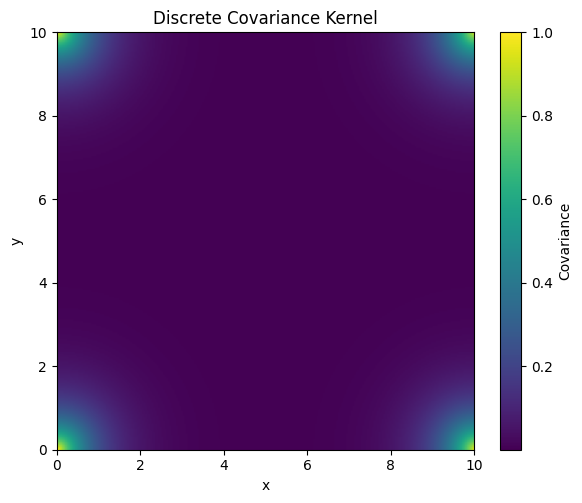

In [117]:
#
# Grid and covariance construction
#

import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
N = 256            # grid size
L = 10.0           # domain length
sigma = 1.0        # variance
ell = 0.7          # correlation length

dx = L / N

# --- Create coordinate differences with periodic wrapping ---
x = np.arange(N)
y = np.arange(N)

# Compute minimal periodic index distances
def periodic_distance(i, N):
    return np.minimum(i, N - i)

ix = periodic_distance(np.arange(N), N)
iy = periodic_distance(np.arange(N), N)

# Create 2D grid of distances
IX, IY = np.meshgrid(ix, iy, indexing='ij')
r = np.sqrt((IX * dx)**2 + (IY * dx)**2)

# --- Exponential covariance ---
C = sigma**2 * np.exp(-r / ell)

# Visualize the covariance kernel
plt.figure(figsize=(6,5))
plt.imshow(C, origin='lower', extent=[0,L,0,L])
plt.colorbar(label="Covariance")
plt.title("Discrete Covariance Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# Spectral Density Computation and Field Synthesis

## 10. Discrete Spectral Density

Given the discrete covariance kernel $C_{ij}$, the discrete power spectral density is obtained via:

$$
S_{kl} = \text{FFT2}(C_{ij}).
$$


Because the covariance is real and symmetric, the resulting spectral density should be real and non-negative. However, due to discretization and numerical precision, small negative values may appear and must be truncated.

The discrete spectral density satisfies:

$$
\mathbb{E} \left [ |\hat{u}_{kl}|^2 \right ] \propto S_{kl},
$$

which allows construction of a correlated field by scaling Fourier-domain white noise.


## 11. Spectral Synthesis Procedure

1. Compute discrete spectral density $S$
2. Enforce non-negativity
3. Generate complex white noise in Fourier space
4. Scale by $\sqrt{S}$
5. Apply inverse FFT
6. Extract real part
7. Verify empirical variance

In [118]:
#
# Spectral density and field generation
#

# --- Compute spectral density ---
S = np.fft.fft2(C).real

# Numerical correction: remove tiny negative values
S[S < 0] = 0.0

# --- Generate complex white noise ---
np.random.seed(42)

noise_real = np.random.normal(size=(N, N))
noise_imag = np.random.normal(size=(N, N))
eta_hat = noise_real + 1j * noise_imag

# --- Scale in Fourier domain ---
u_hat = np.sqrt(S) * eta_hat

# --- Inverse FFT to obtain correlated field ---
u = np.fft.ifft2(u_hat).real

## 12. Variance Consistency Check

The theoretical variance of the field is:

$$
C(0)=\sigma^2.
$$

Because of discretization and FFT normalization conventions, raw inverse transforms may not preserve this exactly. We therefore explicitly rescale the field to match the prescribed variance.

This step ensures:

- Statistical consistency
- Comparability across parameter sweeps
- Numerical robustness in downstream estimation


In [119]:
# --- Normalize to ensure target variance ---
empirical_variance = np.var(u)
u *= sigma / np.sqrt(empirical_variance)

# --- Verify variance ---
print("Target variance:", sigma**2)
print("Empirical variance after normalization:", np.var(u))



Target variance: 1.0
Empirical variance after normalization: 0.9999999999999999


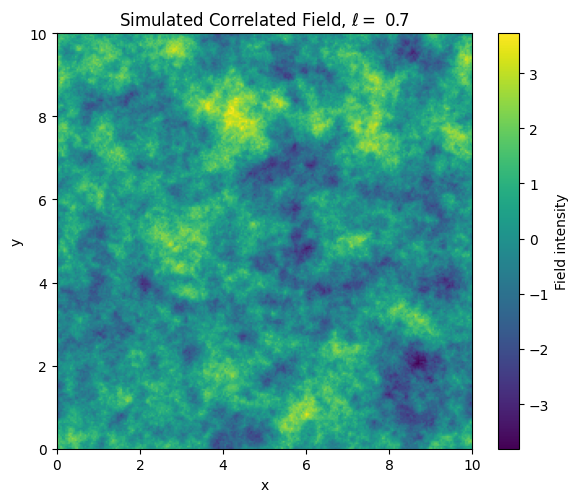

In [120]:
#
# Visualization of simulated field
#

plt.figure(figsize=(6,5))
plt.imshow(u, origin='lower', extent=[0,L,0,L], cmap='viridis')
plt.colorbar(label="Field intensity")
plt.title(rf"Simulated Correlated Field, $\ell =$ {ell}")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# Empirical Autocorrelation Estimation

## 13. Empirical Autocorrelation via FFT

For a zero-mean discrete field $u_{ij}$ defined on a $N \times N$ periodic grid, the empirical autocorrelation at displacement 
$(\Delta i, \Delta j)$ is defined as:

$$
\begin{align}
R(\Delta i, \Delta j) &= \frac{1}{N^2} \sum_{i,j} u_{i,j}u_{i + \Delta i, j + \Delta j} \\
                      &= \frac{1}{N^2} \sum_{i=0}^{N-1} \sum_{j=0}^{N-1} u_{i,j} u_{(i + \Delta i) \bmod N, (j + \Delta j) \bmod N}.
\end{align}
$$

The modulo operation reflects the implicit periodic boundary conditions of the discrete Fourier transform. 

This estimator measures the average product between the field and a shifted version of itself. For stationary fields, 
$R$ depends only on displacement, not absolute position.

**Connection to the convolution theorem**

The double sum above corresponds to a circular convolution of the field with itself. By the convolution theorem:

$$
R = \mathcal{F}^{-1}(\hat{u}\bar{\hat{u}}) = \mathcal{F}^{-1}(|\hat{u}|^2)
$$

where

$$
\hat{u} = \mathcal{F}(u).
$$

Using the convolution instead of the direct form of the definition reduces computational complexity from $\mathcal{O}(N^4)$ to
$\mathcal{O}(N^2 \log N)$.

Because the FFT assumes periodicity, this estimator corresponds to circular autocorrelation, consistent with the spectral synthesis framework.

In [121]:
#
# Implementing empirical autocorrelation
#

# --- Ensure zero mean ---
u_centered = u - np.mean(u)

# --- Compute FFT of field ---
u_hat_emp = np.fft.fft2(u_centered)

# --- Power spectrum ---
power_spectrum = np.abs(u_hat_emp)**2

# --- Inverse FFT to obtain autocorrelation ---
R = np.fft.ifft2(power_spectrum).real / (N * N)

# Shift zero lag to center for visualization
R_shifted = np.fft.fftshift(R)

# --- Check normalization ---
print("Empirical R(0,0):", R_shifted[N//2, N//2])
print("Empirical variance:", np.var(u_centered))

Empirical R(0,0): 0.9999999999999998
Empirical variance: 0.9999999999999999


## 14. Interpretation

For a correctly normalized estimator:

$$
R(0,0) \approx \text{Var}(u).
$$

Small discrepancies may arise due to floating-point precision.

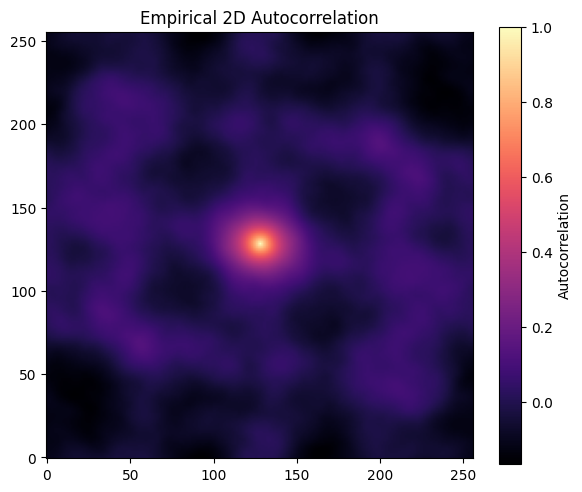

In [122]:
#
# Visualization of 2D Autocorrelation: we should see 
#   - radial symmetry
#   - exponential decay structure
#   - smoothness increasing with larger correlation length \ell
#

plt.figure(figsize=(6,5))
plt.imshow(R_shifted, origin='lower', cmap='magma')
plt.colorbar(label="Autocorrelation")
plt.title("Empirical 2D Autocorrelation")
plt.tight_layout()
plt.show()

# Radial Averaging of the Autocorrelation Function

## 15. From 2D autocorrelation to isotropic correlation function

For an isotropic stationary field, the autocorrelation depends only on radial distance:

$$
R(\Delta i, \Delta j) = R(r), \quad r = \sqrt{(\Delta x)^2 + (\Delta y)^2}.
$$

To estimate the radial correlation function $R(r)$, we average the 2D autocorrelation over concentric circular shells.

Formally, define:

$$
R(r_k) = \frac{1}{|S_k|} \sum_{(\Delta i, \Delta j \in S_k} R(\Delta i, \Delta j)
$$

where

- $S_k$ is the set of points whose radial distance lies within bin $k$
- $|S_k|$ is the number of such points

This produces a one-dimensional function suitable for scale estimation.

In [123]:
#
# Implementation of radial averaging
# We operate on the centered autocorrelation R_shifted, where zero lag is at the center of the array.
#

# --- Compute radial distances from center ---
center = N // 2
y, x = np.indices((N, N))

r_grid = np.sqrt((x - center)**2 + (y - center)**2)
r_grid = r_grid * dx  # convert index distance to physical distance

# --- Flatten arrays for binning ---
r_flat = r_grid.flatten()
R_flat = R_shifted.flatten()

# --- Define radial bins ---
r_max = np.max(r_grid)
num_bins = N // 2
bins = np.linspace(0, r_max, num_bins + 1)

bin_indices = np.digitize(r_flat, bins)

# --- Radial averaging ---
r_values = []
R_radial = []

for k in range(1, len(bins)):
    mask = bin_indices == k
    if np.any(mask):
        r_values.append(np.mean(r_flat[mask]))
        R_radial.append(np.mean(R_flat[mask]))

r_values = np.array(r_values)
R_radial = np.array(R_radial)

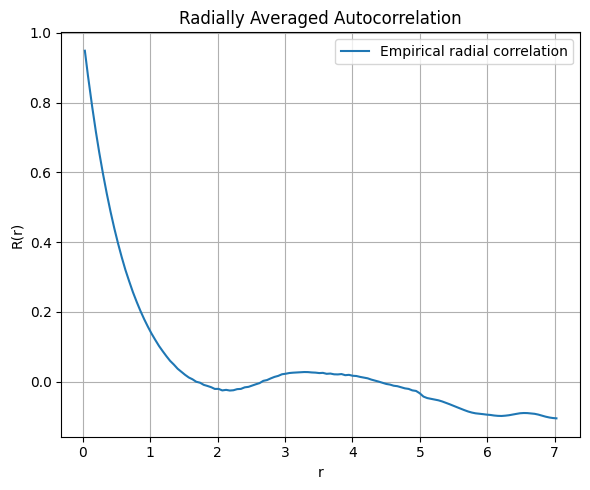

In [124]:
# 
# Visualization of Radial Correlation Function
# 
# We should observe
#   - R(0) ~ \sigma^2
#   - Monotonic decay
#   - Faster decay for smaller correlation length \ell
#

plt.figure(figsize=(6,5))
plt.plot(r_values, R_radial, label="Empirical radial correlation")
plt.xlabel("r")
plt.ylabel("R(r)")
plt.title("Radially Averaged Autocorrelation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 16. Interpretation

For the exponential covariance model:

$$
C(r) = \sigma^2 \exp⁡ \left(-\frac{r}{l} \right),
$$

the empirical radial correlation should approximately follow:

$$
R(r) \propto \exp⁡ \left(-\frac{r}{l} \right),
$$

modulo finite-size and discretization effects.

Radial averaging:

- reduces estimator variance
- exploits isotropy
- enables stable correlation length estimation

This step is **directly transferable to quantitative analysis of microscopy-derived spatial intensity maps**, where isotropic correlation functions are often used to characterize domain size or structural organization scale.

# Correlation Length Estimation

## 17. Normalization and range selection for the fit

We normalize:

$$
\tilde{R}(r) = \frac{R(r)}{R(0)}. 
$$

For exponential decay: 

$$
\tilde{R}(r) = \exp (-r/ \ell).
$$

Taking logarithm:

$$
\ln \tilde{R}(r) = -\frac{r}{\ell}.
$$

So fitting a straight line to:

$$
y = \ln \tilde{R}(r) \quad \text{vs} \quad r
$$

gives slope:

$$
m = -\frac{1}{\ell}.
$$

Thus the estimated correlation length is:

$$
\ell_{est} = -\frac{1}{m}.
$$

We restrict fitting to region where:

- $R(r) > 0$
- $r$ is not too large (to avoid noise-dominated tail)

In [125]:
#
# Correlation length estimation
#

from scipy import stats

# --- Normalize radial correlation ---
R0 = R_radial[0]
R_norm = R_radial / R0

# --- Select fitting region ---
# Exclude r = 0 and tail where correlation is very small
mask = (r_values > 0) & (R_norm > 0.05)

r_fit = r_values[mask]
R_fit = R_norm[mask]

# Log transform
log_R = np.log(R_fit)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(r_fit, log_R)

ell_est = -1.0 / slope

print("True correlation length:", ell)
print("Estimated correlation length:", ell_est)
print("R^2 of fit:", r_value**2)

True correlation length: 0.7
Estimated correlation length: 0.4641384335379424
R^2 of fit: 0.9879201619986527


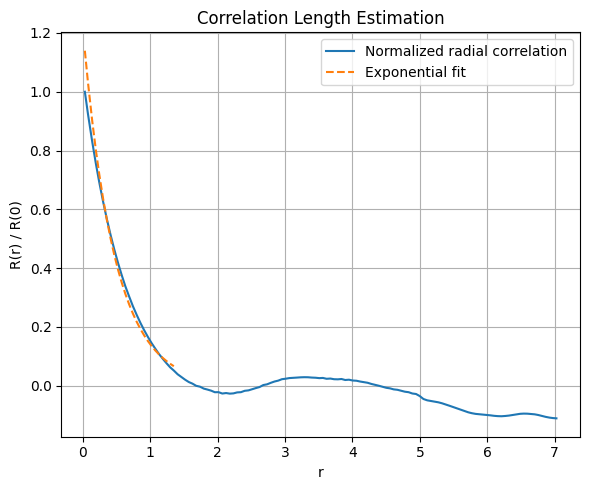

In [126]:
#
# Visualization of fit
#

plt.figure(figsize=(6,5))
plt.plot(r_values, R_norm, label="Normalized radial correlation")
plt.plot(r_fit, np.exp(intercept + slope * r_fit), '--', label="Exponential fit")
plt.xlabel("r")
plt.ylabel("R(r) / R(0)")
plt.title("Correlation Length Estimation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Parameter sweep: correlation length recovery

We now evaluate the estimator across multiple prescribed correlation lengths:

$$
\ell \in \{ \ell_1, \ell_2, ...\}
$$

For each value:

1. Generate a correlated field
2. Estimate radial correlation
3. Fit exponential decay
4. Record the estimated correlation length $\ell_{est}$


In [127]:
#
# Sweep
#

ell_values = [0.2, 0.8, 1.4, 2.0 ]
ell_estimates = []

np.random.seed(123)

for ell in ell_values:
    # --- Construct covariance ---
    C = sigma**2 * np.exp(-r / ell)
    S = np.fft.fft2(C).real
    S[S < 0] = 0.0

    # --- Generate field ---
    noise_real = np.random.normal(size=(N, N))
    noise_imag = np.random.normal(size=(N, N))
    eta_hat = noise_real + 1j * noise_imag

    u_hat = np.sqrt(S) * eta_hat
    u = np.fft.ifft2(u_hat).real

    # Normalize variance
    u *= sigma / np.sqrt(np.var(u))

    # --- Autocorrelation ---
    u_centered = u - np.mean(u)
    u_hat_emp = np.fft.fft2(u_centered)
    R = np.fft.ifft2(np.abs(u_hat_emp)**2).real / (N * N)
    R_shifted = np.fft.fftshift(R)

    # --- Radial averaging ---
    R_flat = R_shifted.flatten()
    bin_indices = np.digitize(r_flat, bins)

    r_values_local = []
    R_radial_local = []

    for k in range(1, len(bins)):
        mask = bin_indices == k
        if np.any(mask):
            r_values_local.append(np.mean(r_flat[mask]))
            R_radial_local.append(np.mean(R_flat[mask]))

    r_values_local = np.array(r_values_local)
    R_radial_local = np.array(R_radial_local)

    # --- Fit ---
    R0 = R_radial_local[0]
    R_norm = R_radial_local / R0

    mask_fit = (r_values_local > 0) & (R_norm > 0.05)

    slope, intercept, *_ = stats.linregress(
        r_values_local[mask_fit],
        np.log(R_norm[mask_fit])
    )

    ell_est = -1.0 / slope
    ell_estimates.append(ell_est)

ell_estimates = np.array(ell_estimates)

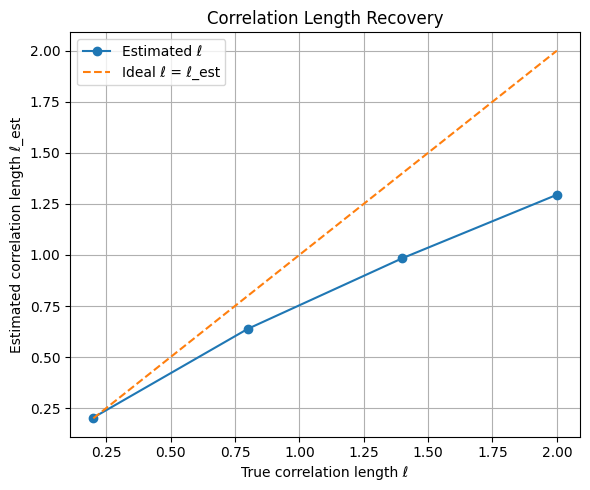

In [128]:
#
# Visualization of recovery
#

plt.figure(figsize=(6,5))
plt.plot(ell_values, ell_estimates, 'o-', label="Estimated ℓ")
plt.plot(ell_values, ell_values, '--', label="Ideal ℓ = ℓ_est")
plt.xlabel("True correlation length ℓ")
plt.ylabel("Estimated correlation length ℓ_est")
plt.title("Correlation Length Recovery")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
#
# Scaling factor
#

alpha = ell_estimates / np.array(ell_values)

print("Mean scaling factor α:", np.mean(alpha))
print("Std of α:", np.std(alpha))

Mean scaling factor α: 0.7915204463840626
Std of α: 0.14148791648336617


# Discussion: finite-domain and discretization effects

The parameter sweep reveals that the recovered correlation length systematically underestimates the true value.

This systematic underestimation arises from several structural factors:

1. Periodic boundary conditions implied by FFT
2. Finite computational domain
3. Discrete radial binning
4. Log-linear fitting sensitivity

Because the field is constructed using a circulant covariance operator, the discrete model differs subtly from the infinite-domain exponential covariance.

## 18. Interpretation

Although absolute correlation lengths are biased, the estimator demonstrates:

- Stable monotonic scaling
- Bounded variance
- Linear proportionality between $\ell$ and $\ell_{est}$

This suggests that relative scale comparisons remain robust under fixed discretization settings.

Such finite-domain effects are directly relevant in quantitative imaging applications, where limited field-of-view and pixel resolution may introduce systematic distortions in spatial correlation estimates.

# Conclusion

Summarizing:

- Spectral synthesis enables controlled spatial modeling
- FFT-based autocorrelation provides efficient estimation
- Radial averaging reduces variance
- Correlation length recovery is stable but biased under periodic discretization